In [1]:
import os

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks', font_scale=1.5)
mpl.rcParams["text.usetex"] = True
mpl.rcParams["mathtext.fontset"] = 'cm'
mpl.rcParams['font.family'] = ['sans-serif']

if not os.path.exists('../figures'):
    os.makedirs('../figures')

In [2]:
s_tag = 'trustconstr'

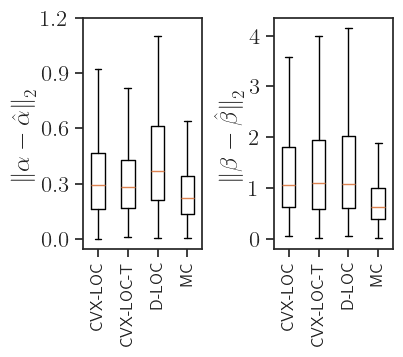

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(4, 3))

alphas = np.load('../data/2arm/alphas.npy')
betas = np.load('../data/2arm/betas.npy')

alpha_res = []
beta_res = []
for tag in [f'cvx_{s_tag}', f'cvx_truc_{s_tag}', f'direct_{s_tag}', 'mc']:
    htalphas = np.load(f'../outputs/2arm/htalphas_{tag}.npy')
    htbetas = np.load(f'../outputs/2arm/htbetas_{tag}.npy')
    alpha_res.append(np.sqrt(np.sum((alphas - htalphas) ** 2, axis=-1)))
    beta_res.append(np.sqrt(np.sum((betas - htbetas) ** 2, axis=-1)))
axs[0].boxplot(alpha_res, showfliers=False)
axs[1].boxplot(beta_res, showfliers=False)

axs[0].set_ylabel(r"${\|\alpha - \hat{\alpha}\|}_2$")
axs[1].set_ylabel(r"${\|\beta - \hat{\beta}\|}_2$")
axs[0].set_yticks(np.arange(0, 1.3, 0.3))
axs[1].set_yticks(np.arange(0, 4.1, 1))

xticklabels = ['CVX-LOC', 'CVX-LOC-T', 'D-LOC', 'MC']
for ax in axs:
    ax.set_xticks(np.arange(1, 5))
    ax.set_xticklabels(xticklabels, rotation=90, fontsize=12)

fig.subplots_adjust(wspace=0.6)
# plt.tight_layout()

fig.savefig('../figures/params_2arm.pdf', bbox_inches='tight')

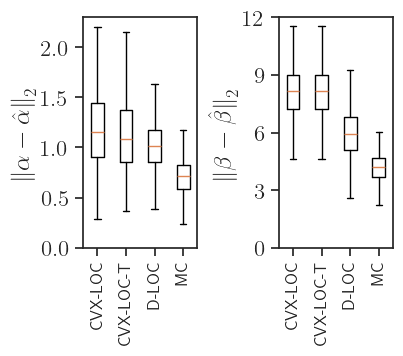

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(4, 3))

alphas = np.load('../data/10arm/alphas.npy')
betas = np.load('../data/10arm/betas.npy')

alpha_res = []
beta_res = []
for tag in [f'cvx_{s_tag}', f'cvx_truc_{s_tag}', f'direct_{s_tag}', 'mc']:
    htalphas = np.load(f'../outputs/10arm/htalphas_{tag}.npy')
    htbetas = np.load(f'../outputs/10arm/htbetas_{tag}.npy')
    alpha_res.append(np.sqrt(np.sum((alphas - htalphas) ** 2, axis=-1)))
    beta_res.append(np.sqrt(np.sum((betas - htbetas) ** 2, axis=-1)))
axs[0].boxplot(alpha_res, showfliers=False)
axs[1].boxplot(beta_res, showfliers=False)

axs[0].set_ylabel(r"${\|\alpha - \hat{\alpha}\|}_2$")
axs[1].set_ylabel(r"${\|\beta - \hat{\beta}\|}_2$")
axs[0].set_yticks(np.arange(0, 2.5, 0.5))
axs[1].set_yticks(np.arange(0, 13, 3))

xticklabels = ['CVX-LOC', 'CVX-LOC-T', 'D-LOC', 'MC']
for ax in axs:
    ax.set_xticks(np.arange(1, 5))
    ax.set_xticklabels(xticklabels, rotation=90, fontsize=12)

fig.subplots_adjust(wspace=0.71)
# plt.tight_layout()

fig.savefig('../figures/params_10arm.pdf', bbox_inches='tight')

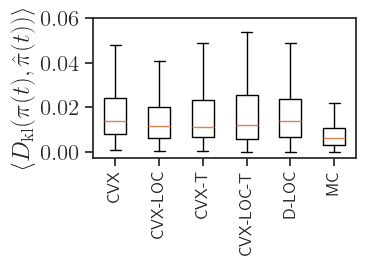

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3))

values = np.load('../data/2arm/values.npy')
pis = np.exp(values) / np.sum(np.exp(values), axis=-1, keepdims=True)

kls = []
for vtag in ['cvx', f'cvx_{s_tag}', 'cvx_truc', f'cvx_truc_{s_tag}', f'direct_{s_tag}', 'mc']:
    htvalues = np.load(f'../outputs/2arm/htvalues_{vtag}.npy')
    htpis = np.exp(htvalues) / np.sum(np.exp(htvalues), axis=-1, keepdims=True)
    kls.append(np.mean(np.sum(sp.special.kl_div(pis, htpis), axis=-1), axis=-1))
axs.boxplot(kls, showfliers=False)

axs.set_ylabel(r"$\langle D_{\rm kl}(\pi(t), \hat{\pi}(t)) \rangle$")
axs.set_yticks(np.arange(0, 0.07, 0.02))

xticklabels = ['CVX', 'CVX-LOC', 'CVX-T', 'CVX-LOC-T', 'D-LOC', 'MC']
axs.set_xticks(np.arange(1, 7))
axs.set_xticklabels(xticklabels, rotation=90, fontsize=12)

plt.tight_layout()

fig.savefig('../figures/dkl_2arm.pdf', bbox_inches='tight')

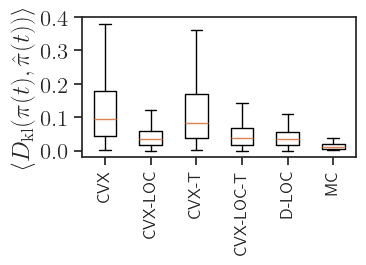

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3))

values = np.load('../data/10arm/values.npy')
pis = np.exp(values) / np.sum(np.exp(values), axis=-1, keepdims=True)

kls = []
for vtag in ['cvx', f'cvx_{s_tag}', 'cvx_truc', f'cvx_truc_{s_tag}', f'direct_{s_tag}', 'mc']:
    htvalues = np.load(f'../outputs/10arm/htvalues_{vtag}.npy')
    htpis = np.exp(htvalues) / np.sum(np.exp(htvalues), axis=-1, keepdims=True)
    kls.append(np.mean(np.sum(sp.special.kl_div(pis, htpis), axis=-1), axis=-1))
axs.boxplot(kls, showfliers=False)

axs.set_ylabel(r"$\langle D_{\rm kl}(\pi(t), \hat{\pi}(t)) \rangle$")
axs.set_yticks(np.arange(0, 0.41, 0.1))

xticklabels = ['CVX', 'CVX-LOC', 'CVX-T', 'CVX-LOC-T', 'D-LOC', 'MC']
axs.set_xticks(np.arange(1, 7))
axs.set_xticklabels(xticklabels, rotation=90, fontsize=12)

plt.tight_layout()

fig.savefig('../figures/dkl_10arm.pdf', bbox_inches='tight')

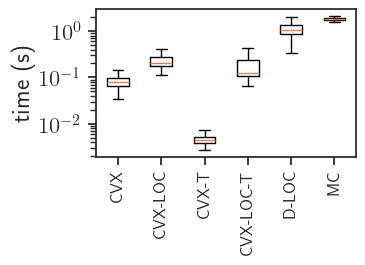

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3))

times = []
for logf in ['log_cvx', f'log_cvx_{s_tag}', 'log_cvx_truc', f'log_cvx_truc_{s_tag}', f'log_direct_{s_tag}', 'log_mc']:
    df = pd.read_csv(f'../outputs/2arm/{logf}.csv')
    if ('cvx' in logf) and (s_tag in logf):
        times.append(df['s1_time'] + df['s2_time'])
    else:
        times.append(df['time'])
axs.boxplot(times, showfliers=False)
axs.set_yscale('log')

axs.set_ylabel('time (s)')

xticklabels = ['CVX', 'CVX-LOC', 'CVX-T', 'CVX-LOC-T', 'D-LOC', 'MC']
axs.set_xticks(np.arange(1, 7))
axs.set_xticklabels(xticklabels, rotation=90, fontsize=12)

plt.tight_layout()
fig.savefig('../figures/time_2arm.pdf', bbox_inches='tight')

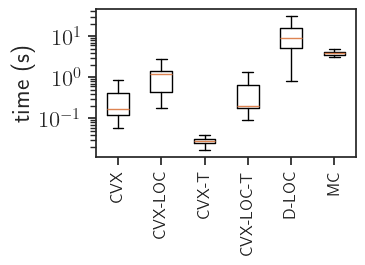

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3))

times = []
for logf in ['log_cvx', f'log_cvx_{s_tag}', 'log_cvx_truc', f'log_cvx_truc_{s_tag}', f'log_direct_{s_tag}', 'log_mc']:
    df = pd.read_csv(f'../outputs/10arm/{logf}.csv')
    if ('cvx' in logf) and (s_tag in logf):
        times.append(df['s1_time'] + df['s2_time'])
    else:
        times.append(df['time'])
axs.boxplot(times, showfliers=False)
axs.set_yscale('log')

axs.set_ylabel('time (s)')

xticklabels = ['CVX', 'CVX-LOC', 'CVX-T', 'CVX-LOC-T', 'D-LOC', 'MC']
axs.set_xticks(np.arange(1, 7))
axs.set_xticklabels(xticklabels, rotation=90, fontsize=12)

plt.tight_layout()
fig.savefig('../figures/time_10arm.pdf', bbox_inches='tight')